<a href="https://colab.research.google.com/github/nhuttran1356/CNN-/blob/main/food_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

import cv2
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.layers import Input, Flatten, Dense, Dropout
from keras.models import Model
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [6]:
#Load data from folder
train_data = ImageDataGenerator(rescale=1./255,rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,brightness_range=[0.2,1.5], fill_mode="nearest") 
train_set = train_data.flow_from_directory('/content/drive/MyDrive/data_food/train',target_size = (100,100),batch_size = 40, class_mode = 'categorical')

test_data = ImageDataGenerator(rescale=1./255,rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,brightness_range=[0.2,1.5], fill_mode="nearest")
test_set = test_data.flow_from_directory('/content/drive/MyDrive/data_food/test',target_size = (100,100),batch_size = 40, class_mode = 'categorical')

Found 1364 images belonging to 11 classes.
Found 213 images belonging to 11 classes.


In [7]:
train_set.class_indices

{'bánh bèo': 0,
 'bánh mì': 1,
 'bánh tráng trộn': 2,
 'bánh xèo': 3,
 'cá viên chiên': 4,
 'cơm chiên trứng': 5,
 'gỏi cuốn': 6,
 'mì xào': 7,
 'ốc nhồi thịt': 8,
 'phở': 9,
 'pizza': 10}

In [8]:
#build CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPooling2D
model = Sequential()
model.add(Conv2D(16,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(100,100,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(11,activation='softmax'))


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 20000)             0         
                                                                 
 dense (Dense)               (None, 512)               1

In [10]:
# #train model
# model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# print("Training model")
# history = model.fit(x = train_set, validation_data = test_set, epochs = 10, batch_size =64, verbose = 1)
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',  metrics=['accuracy'])
from keras.callbacks import EarlyStopping
history = model.fit(train_set, epochs = 50, validation_data = test_set, verbose=1, batch_size =64 ,callbacks=[EarlyStopping(monitor='val_accuracy', patience=50,restore_best_weights=True)])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
35/35 [==============================] - 377s 10s/step - loss: 13.7502 - accuracy: 0.1716 - val_loss: 2.9441 - val_accuracy: 0.2300
Epoch 2/50
35/35 [==============================] - 8s 238ms/step - loss: 2.9933 - accuracy: 0.2097 - val_loss: 2.9502 - val_accuracy: 0.2488
Epoch 3/50
35/35 [==============================] - 8s 236ms/step - loss: 2.3082 - accuracy: 0.2647 - val_loss: 2.0623 - val_accuracy: 0.2911
Epoch 4/50
35/35 [==============================] - 8s 236ms/step - loss: 2.1835 - accuracy: 0.2881 - val_loss: 2.2820 - val_accuracy: 0.2441
Epoch 5/50
35/35 [==============================] - 8s 240ms/step - loss: 2.1694 - accuracy: 0.2537 - val_loss: 2.1410 - val_accuracy: 0.3192
Epoch 6/50
35/35 [==============================] - 8s 235ms/step - loss: 2.1170 - accuracy: 0.2852 - val_loss: 2.1526 - val_accuracy: 0.2958
Epoch 7/50
35/35 [==============================] - 8s 238ms/step - loss: 2.0196 - accuracy: 0.3240 - val_loss: 2.0274 - val_accuracy: 0.2864
Epoch

In [11]:
#save model after training
model.save('final_food.h5')

In [13]:
from keras.models import load_model
model =load_model('/content/drive/MyDrive/final_food.h5')

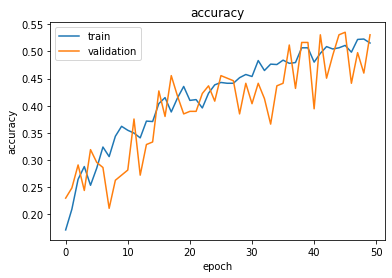

In [12]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc = 'upper left')
plt.show()

[9]
phở


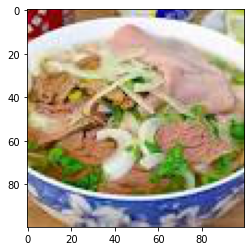

In [21]:
from keras.preprocessing.image import load_img,img_to_array
from keras_preprocessing import image
classes = ['bánh bèo','bánh mì',
 'bánh tráng trộn',
 'bánh xèo',
 'cá viên chiên',
 'cơm chiên trứng',
 'gỏi cuốn',
 'mì xào',
 'ốc nhồi thịt',
 'phở',
 'pizza']
test_image = image.load_img('/content/drive/MyDrive/data_food/test/phở/pho.jpg', target_size=(100, 100))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
result1 = np.argmax(result,axis = 1)
print(result1)
result1 = result[0]
for y in range(12):
    if result1[y] == 1.:
        break
prediction = classes[y]
print(prediction)